# Visão Computacional com Aprendizado Profundo

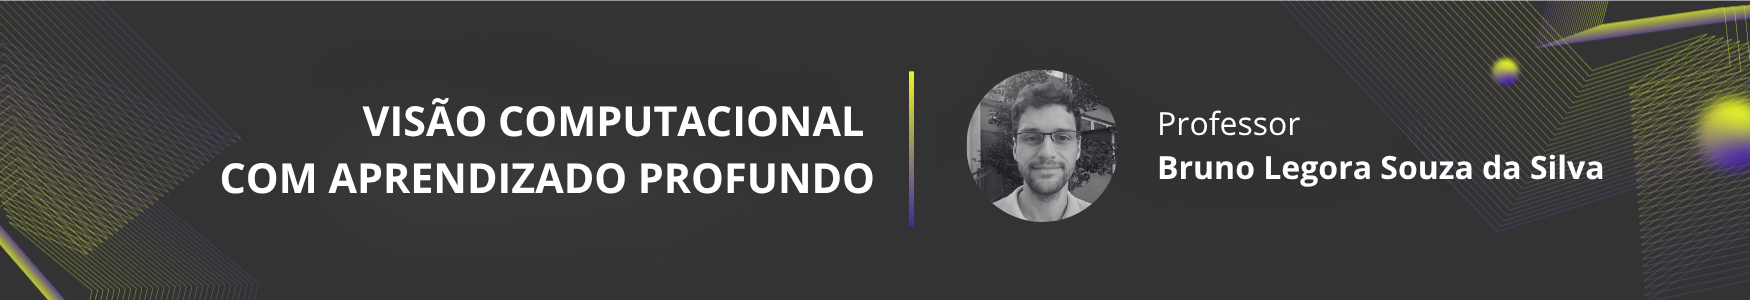

# Laboratório 3 - Operações de Filtragem e Processamento Multi Resolução

Neste laboratório, iremos ver algumas outras operações de pixels com imagens.

No Lab 2, já vimos algumas operações/transformações com as cores das imagens. Vamos relembrá-las.

Para começar, vamos baixar nossa imagem teste:

In [ ]:
!wget https://picsum.photos/384/216 -O image.jpg -q

Carregando a imagem:

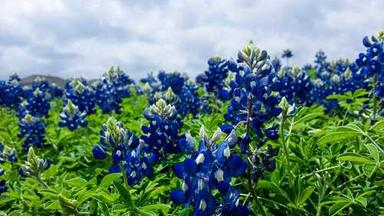

In [ ]:
import cv2

# Lê imagem JPG
img = cv2.imread('image.jpg')

# O google colab possui algumas questões com a função imshow da biblioteca OpenCV,
# e por isso, disponibiliza um "patch" para que ela possa ser utilizada.

from google.colab.patches import cv2_imshow

cv2_imshow(img)

Fazendo uma alteração de cor simples:

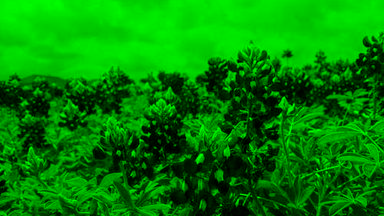

In [ ]:
img4 = img.copy()
img4[:,:,2] = 0
img4[:,:,0] = 0 # Deixamos apenas a cor verde
cv2_imshow(img4)

## Parte 1: Filtragem

Algumas imagens podem ser capturadas com ruídos. Isso, é, podemos ver "problemas" (descontinuidades) de cor na própria imagem.

Neste laboratório, também trabalharemos com a imagem em tons de cinza. Porém, as operações podem ser feitas separadamente em cada canal, para o caso RGB/BGR.





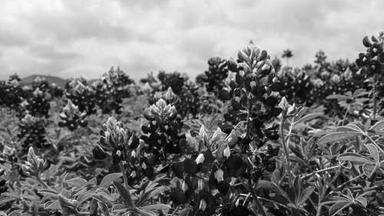

In [ ]:
img_gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
cv2_imshow(img_gray)

Nesse laboratório, iremos simular o ruído chamado "sal e pimenta", onde as intensidades são aleatoriamente trocadas por 0 ou 255 (preto ou branco, respectivamente).

Existem diversos outros tipos de ruídos em imagens. Para mais informações, vocÊ pode consultar os livros da disciplina ou o link: https://en.wikipedia.org/wiki/Image_noise

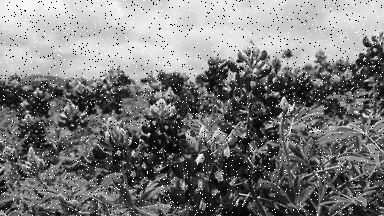

In [ ]:
# O código abaixo insere ruído em uma imagem em tons de cinza.

!wget https://gist.githubusercontent.com/gutierrezps/f4ddad3bbd2ad5a9b96e3c06378e28b4/raw/b5e3d54c80e2d0c3e437701532903e61b9c28bc8/cv2_noise.py -O cv2_noise.py -q

from cv2_noise import sp_noise

img_ruidosa = sp_noise(img_gray,0.05)

cv2_imshow(img_ruidosa)


Nosso objetivo aqui é melhorar a imagem ruidosa acima. A tarefa de "denoising" é bastante complexa, e geralmente não conseguimos encontrar a imagem original exatamente. Porém, há formas de melhorar a qualidade visual da imagem.

Iremos ver duas possibilidades: O filtro de média e o filtro gaussiano.

### 1.1 - Filtro de Média

Como explicado na apresentação, o "filtro de média" é uma operação que "percorre" uma janela pela imagem. Em geral, essa janela é centralizada numa posição (i,j) da imagem, e o valor img(i,j) assume o valor da média dos valores dessa janela.

Para simplificar, vamos usar a própria função de filtragem do opencv (que cria as janelas e faz a "soma ponderada" dos valores das imagens ponderados pelos valores dos filtros).

No caso, iremos iniciar criar um filtro de média - uma matriz quadrada de N² elementos iguais ao valor $\frac{1}{N^2}$. Essa matriz geralmente é chamada de *kernel* no contexto de filtragem.

In [ ]:
TAMANHO_JANELA = 3 # Criaremos uma matriz 3x3

import numpy as np

kernel = np.ones((TAMANHO_JANELA,TAMANHO_JANELA))/(TAMANHO_JANELA*TAMANHO_JANELA)

print(kernel)

[[0.11111111 0.11111111 0.11111111]
 [0.11111111 0.11111111 0.11111111]
 [0.11111111 0.11111111 0.11111111]]


Agora precisamos realizar a operação de filtragem. Para isso, usaremos a função filter2d do OpenCV. Essa função recebe a imagem e o kernel, principalmente, e realiza a operação de convolução, descrita na apresentação.

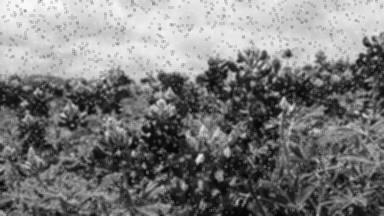

In [ ]:
img_filtrada3 = cv2.filter2D(img_ruidosa, -1, kernel) # -1 indica que é pra usar o mesmo "formato" da entrada

cv2_imshow(img_filtrada3)

Reparem que o ruído ficou "menos intenso". Porém, houve um "efeito colateral" na imagem. Qual seria?

Vamos ver a mesma operação para outros tamanhos de kernel:

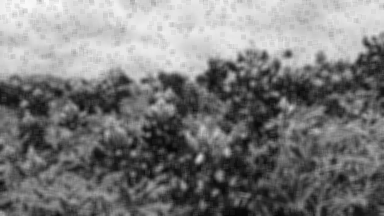

In [ ]:
kernel5 = np.ones((5,5))/(5*5)
img_filtrada5 = cv2.filter2D(img_ruidosa, -1, kernel5) # -1 indica que é pra usar o mesmo "formato" da entrada

cv2_imshow(img_filtrada5)

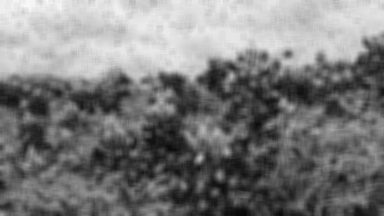

In [ ]:
kernel7 = np.ones((7,7))/(7*7)
img_filtrada7 = cv2.filter2D(img_ruidosa, -1, kernel7) # -1 indica que é pra usar o mesmo "formato" da entrada

cv2_imshow(img_filtrada7)

Quanto maior o *kernel*, mais "borrada" (desfocada) fica a imagem. Essa é uma característica do "filtro de média".

Refaçam o teste alterando o valor da variável probabilidade abaixo, e vejam se há alguma alteração:

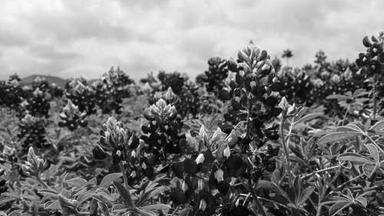

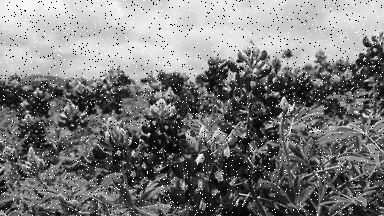

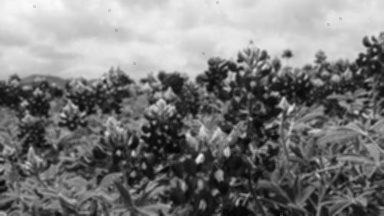

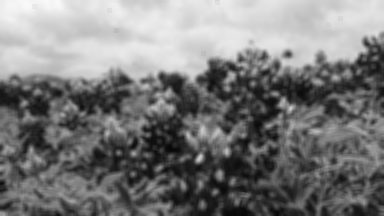

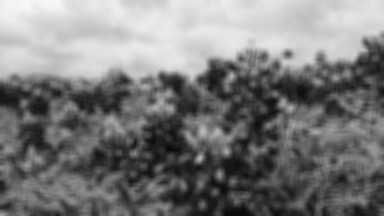

In [ ]:
PROBABILIDADE = 0.001

img_ruidosa2 = sp_noise(img_gray,PROBABILIDADE)
cv2_imshow(img_gray)
cv2_imshow(img_ruidosa)
cv2_imshow(cv2.filter2D(img_ruidosa2, -1, kernel))
cv2_imshow(cv2.filter2D(img_ruidosa2, -1, kernel5))
cv2_imshow(cv2.filter2D(img_ruidosa2, -1, kernel7))

### 1.2 - Filtragem Gaussiana

Outro tipo de filtragem é a chamada Filtragem Gaussiana. A operação dela é exatamente igual a filtragem de média, porém, o que é alterado é o *kernel*. No caso, o kernel segue uma função gaussiana 2D, como mostra a imagem abaixo.

No caso abaixo, $\sigma^2$ é a variância da função gaussiana.


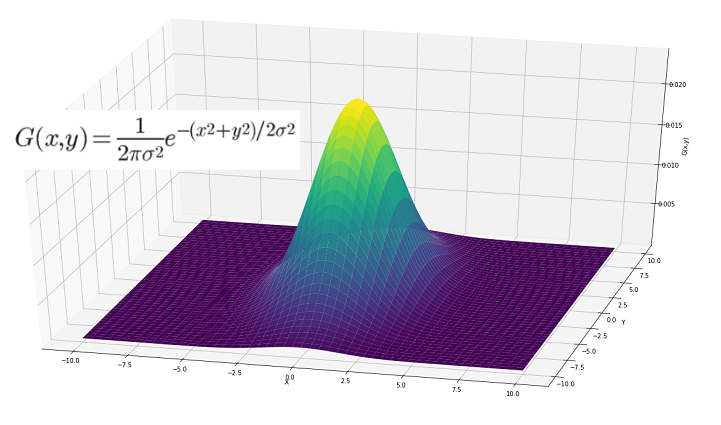



Vamos construir um *kernel* gaussiano:

[[0.05854983 0.09653235 0.05854983]
 [0.09653235 0.15915494 0.09653235]
 [0.05854983 0.09653235 0.05854983]]


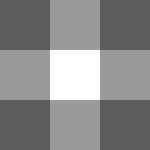

In [ ]:
var = 1

# Uma coisa que devemos considerar aqui é que a gaussiana deve estar centralizada no nosso kernel,
# Então a equação irá mudar um pouquinho. No caso da imagem, o centro é em (0,0)
# Agora, o expoente deve considerar (x-cx)**2 + (y-cy)**2

TAM_KERNEL = 3
cx = 1
cy = 1

# Em um kernel 3x3, a posição (1,1) representa o centro!

kernel_gaussiano = np.zeros((TAM_KERNEL,TAM_KERNEL))

for i in range(TAM_KERNEL):
  for j in range(TAM_KERNEL):
    expoente = -( (i-cx)**2 + (j-cy)**2 )/(2*var)
    kernel_gaussiano[i,j] = (1/(2*np.pi*var))*np.exp(expoente)

print(kernel_gaussiano)

# Reparem que o valor máximo é centralizado e os vizinhos possuem valores menores.


# Para visualização apenas:

cv2_imshow(np.kron(kernel_gaussiano,255*np.ones((50,50))/np.max(kernel_gaussiano)).astype(np.uint8))


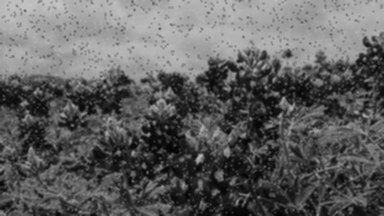

In [ ]:
img_filtrada_gaussiana = cv2.filter2D(img_ruidosa,-1,kernel_gaussiano)
cv2_imshow(img_filtrada_gaussiana)

Comparando com a filtragem de média:

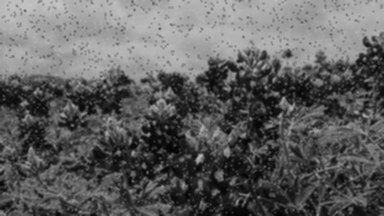

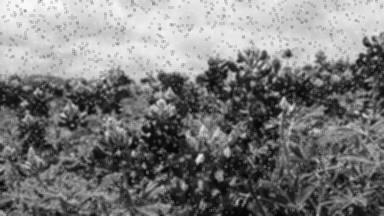

In [ ]:
cv2_imshow(img_filtrada_gaussiana)
cv2_imshow(img_filtrada3)

Reparem como a imagem com filtro gaussiano está mais escura que a com filtro de média.

Isso ocorre pois a soma dos pesos do filtro gaussiano não soma 1.

A operação é uma soma ponderada, cujos pesos não somam um. Então, na média, o resultado sempre será menor que as intensidades vizinhas, caso a soma de seus pesos seja menor que um, ou sempre maior que as intensidades originais, caso sua soma seja maior que um.

Para corrigir esse problema, podemos normalizar o kernel gaussiano para que a soma de seus valores seja um:

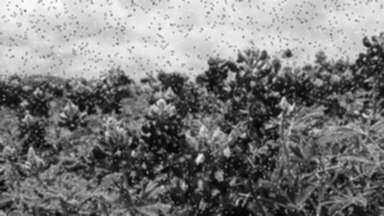

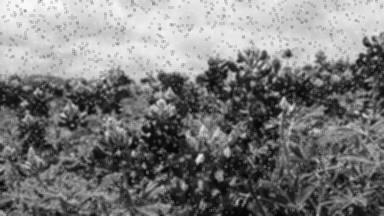

In [ ]:
kernel_gaussiano_norm = kernel_gaussiano/np.sum(kernel_gaussiano)
img_filtrada_gaussiana2 = cv2.filter2D(img_ruidosa,-1,kernel_gaussiano_norm)
cv2_imshow(img_filtrada_gaussiana2)
cv2_imshow(img_filtrada3)

Agora, testem a filtragem gaussiana variando os valores das variáveis var (variância) e TAM_KERNEL (tamanho do kernel):

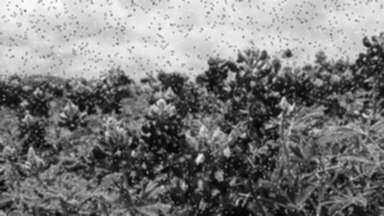

In [ ]:
var = 1

TAM_KERNEL = 3
cx = TAM_KERNEL // 2
cy = TAM_KERNEL //2

kernel_gaussiano2 = np.zeros((TAM_KERNEL,TAM_KERNEL))

for i in range(TAM_KERNEL):
  for j in range(TAM_KERNEL):
    expoente = -( (i-cx)**2 + (j-cy)**2 )/(2*var)
    kernel_gaussiano2[i,j] = (1/(2*np.pi*var))*np.exp(expoente)

kernel_gaussiano2_norm = kernel_gaussiano2/np.sum(kernel_gaussiano2)
img_filtrada_gaussiana3 = cv2.filter2D(img_ruidosa,-1,kernel_gaussiano2_norm)

cv2_imshow(img_filtrada_gaussiana3)

Nas seções 1.1 e 1.2, nós vimos dois tipos de filtragem: média e gaussiana. Em ambos os casos, pudemos ver que a imagem tem o seu ruído atenuado, mas em compensação fica desfocada. Essas filtragens tem a característica de eliminar as "bordas" - regiões que definem onde há alteração de objetos.

Na próxima seção, veremos um tipo de filtragem que realça essas regiões (de borda).


### Parte 1.3 - Filtragem Derivativa

Um outro tipo de filtragem é a chamada "derivativa", onde usamos um *kernel* que aplica uma operação similar a operação de derivada.

Podemos usar dois *kernels* aqui: um que realça as diferenças "horizontais" e outro que realça as diferenças "verticais".

Matematicamente, a derivada de uma função discreta é aproximada por:

$ f'(x) \approx \frac{f(x+h) - f(x)}{h} $

Como em uma imagem, a menor diferença espacial é 1, aproximamos a derivada por: $f'(x) \approx f(x+h) - f(x) $.

Isso é representado por um kernel com 2 elementos, um positivo e um negativo:

$ \begin{bmatrix} -1 & 1 \end{bmatrix} $, para derivada horizontal.


$ \begin{bmatrix} -1 \\ 1 \end{bmatrix} $, para derivada vertical.

Obs: Os filtros apresentados nos slides diferem destes apenas por uma constante multiplicada. Mas a operação de diferenciação (diferença de valores de pixels) ainda é feita.

Vamos ver como elas funcionam. Primeiro vamos a derivada horizontal.


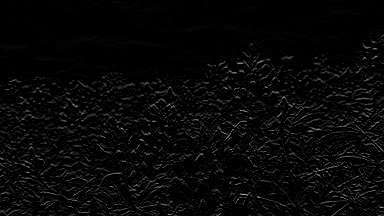

In [ ]:
kernel_horz = np.asarray([-1,1])

img_horz = cv2.filter2D(img_gray,-1,kernel_horz)

cv2_imshow(img_horz)

Em seguida, vamos ver a derivada vertical.

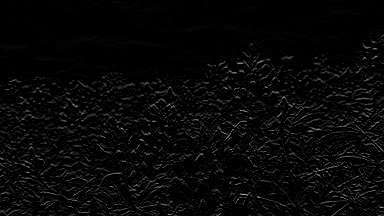

In [ ]:
kernel_vert = np.asarray([[-1],[1]])

img_vert = cv2.filter2D(img_gray,-1,kernel_vert)

cv2_imshow(img_vert)

Dependendo da imagem original, não há muitas diferenças visuais entre as imagens apresentadas acima. Caso isso aconteça, sugiro executar esse notebook desde o início, baixando outra imagem.

Na imagem da apresentação, essa diferença é bem visível!

## Parte 2: Processamento Multi Resolução

A operação de filtragem também pode ser utilizada para encontrar objetos em imagens.

Podemos usar o kernel como um "template" de busca. Porém, há um problema com relação a objetos em diferentes tamanhos. Para resolver esse problema, fazemos um processamento multi resolução.

**OBS: ESTA SEÇÃO USA 2 ARQUIVOS QUE ESTÃO DISPONÍVEIS PARA DOWNLOAD NO AVA/MOODLE. BAIXE-OS E FAÇA UPLOAD PARA O AMBIENTE DE EXECUÇÃO DO COLAB (ÍCONE DE PASTA À ESQUERDA)**

O processamento multi resolução pode ser usado, por exemplo, para encontrar objetos em múltiplas escalas.

Para exemplificar, vamos tentar encontrar objetos circulares na nossa imagem exemplo. Nosso template (objeto circular que queremos encontrar) é apresentado abaixo:




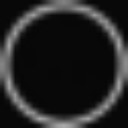

In [ ]:
template = cv2.imread("template.png")

template = cv2.cvtColor(template,cv2.COLOR_BGR2GRAY)

cv2_imshow(cv2.resize(template,(128,128)))


Iremos tentar encontrar esses círculos na imagem abaixo. Reparem que há vários círculos de tamanhos diferentes!

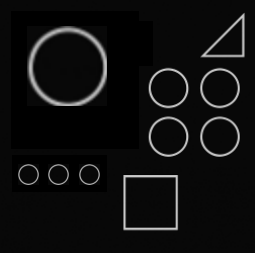

In [ ]:
imagem_busca = cv2.imread("FORMAS LAB 3.png")

imagem_busca = cv2.cvtColor(imagem_busca,cv2.COLOR_BGR2GRAY)

cv2_imshow(imagem_busca)

In [ ]:
# Nessa operação, queremos realçar os objetos com formato circular dos demais.
# Para isso, vamos converter a imagem e o kernel de inteiro de 8 bits para float32.
# Após, vamos realizar a filtragem.

# Também vamos mexer no template para que a soma dos seus elementos dê zero.
template_float = template.astype(np.float32)
template_float -= template_float.mean()
kernel = template_float

# Fazemos a filtragem:
def build_gaussian_pyramid(img, levels=3):
    pyramid = [img.copy()]
    for _ in range(levels):
        img = cv2.pyrDown(img)
        pyramid.append(img)
    return pyramid


No exemplo acima, pudemos ver que detecções circulares foram encontradas por nosso algoritmo de visão computacional. Porém, apenas os de um tamanho específico.

Os de maior tamanho não foram encontrados pois não estão na mesma escala que o template. Uma das formas de representar isso é fazendo um processamento multi escala.

Uma das formas de fazer isso é usando o que chamamos de pirâmida gaussiana. Essa pirâmide é basicamente uma combinação das operações de filtragem gaussiana, que vimos na Seção 1.2 desse laboratório, e uma operação de resize.

Em geral, ao utilizar uma pirâmide gaussiana, processamos a imagem sucessivas vezes usando resoluções diferentes (de cada uma é metade da outra).

Para nos ajudar, o OpenCV já nos fornece as funções:
  - pyrDown(img): diminui a largura e altura da imagem pela metade.
  - pyrUp(img): dobra a largura e altura da imagem

Vamos fazer um passo a passo:

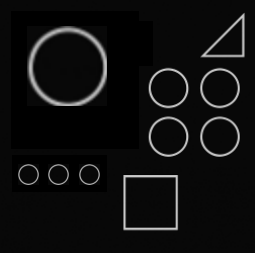

(253, 255)


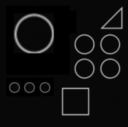

(127, 128)


In [ ]:
imagem_busca_metade = cv2.pyrDown(imagem_busca)
cv2_imshow(imagem_busca)
print(imagem_busca.shape)

cv2_imshow(imagem_busca_metade)
print(imagem_busca_metade.shape)

Repetindo o processo feito para a resolução original:

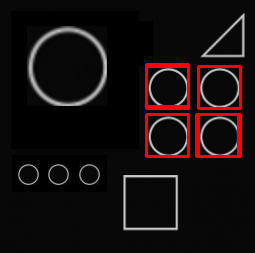

In [ ]:
response = cv2.filter2D(imagem_busca_metade.astype(np.float32), -1, kernel)

response_norm = cv2.normalize(response, None, 0, 255, cv2.NORM_MINMAX).astype(np.uint8)

threshold = 255*0.8

detections = np.where(response_norm >= threshold)

output2 = cv2.cvtColor(imagem_busca, cv2.COLOR_GRAY2BGR)

h,w = kernel.shape
for i in range(len(detections[0])):
    y = detections[0][i]
    x = detections[1][i]
    # Cuidado aqui!!! A nossa imagem "de trabalho" tem metade do tamanho, então as
    # coordenadas estão divididas por dois!
    top_left_corner = (2*int(x-h/2),2*int(y-w/2))
    bottom_right_corner = (2*int(x+h/2),2*int(y+w/2))
    cv2.rectangle(output2, top_left_corner, bottom_right_corner, (0, 0, 255), 2)

cv2_imshow(output2)

Neste caso, apenas os círculos "médios" foram encontrados!
Vamos fazer para uma imagem de 1/4 de tamanho:

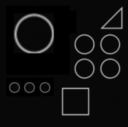

(127, 128)


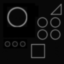

(64, 64)


In [ ]:
imagem_busca_umquarto = cv2.pyrDown(imagem_busca_metade)
cv2_imshow(imagem_busca_metade)
print(imagem_busca_metade.shape)

cv2_imshow(imagem_busca_umquarto)
print(imagem_busca_umquarto.shape)

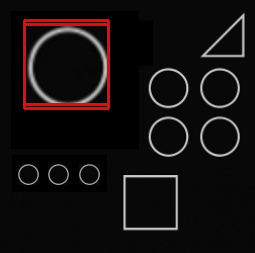

In [ ]:
response = cv2.filter2D(imagem_busca_umquarto.astype(np.float32), -1, kernel)

response_norm = cv2.normalize(response, None, 0, 255, cv2.NORM_MINMAX).astype(np.uint8)

threshold = 255*0.8

detections = np.where(response_norm >= threshold)

output2 = cv2.cvtColor(imagem_busca, cv2.COLOR_GRAY2BGR)


for i in range(len(detections[0])):
    y = detections[0][i]
    x = detections[1][i]
    # Cuidado aqui!!! A nossa imagem "de trabalho" tem um quarto do tamanho, então as
    # coordenadas estão divididas por quatro!
    top_left_corner = (4*int(x-h/2),4*int(y-w/2))
    bottom_right_corner = (4*int(x+h/2),4*int(y+w/2))
    cv2.rectangle(output2, top_left_corner, bottom_right_corner, (0, 0, 255), 2)

cv2_imshow(output2)

Agora, encontramos o círculo maior!

Vamos juntar todo o processamento em um único código:

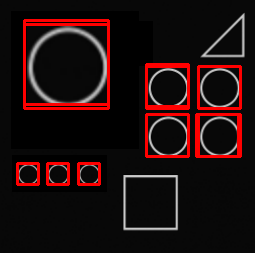

In [ ]:
niveis = 3
img = imagem_busca.copy()
output = cv2.cvtColor(imagem_busca, cv2.COLOR_GRAY2BGR)

for i in range(0,niveis):
  response = cv2.filter2D(img.astype(np.float32), -1, kernel)
  response_norm = cv2.normalize(response, None, 0, 255, cv2.NORM_MINMAX).astype(np.uint8)
  threshold = 255*0.8
  detections = np.where(response_norm >= threshold)

  for j in range(len(detections[0])):
      y = detections[0][j]
      x = detections[1][j]
      # Cuidado aqui!!! A nossa imagem "de trabalho" tem tamanhos diferentes, de
      # acordo com o nível de pirâmide. Como os tamanhos são sempre potências de
      # 1/2, vamos considerar que o fator multiplicador deve ser uma potência de
      # 2. Sendo 2^0 para o nível 0, 2^1 para o nível 1, 2^2 para o nível 2, etc...
      top_left_corner = ((2**i)*int(x-h/2),(2**i)*int(y-w/2))
      bottom_right_corner = ((2**i)*int(x+h/2),(2**i)*int(y+w/2))
      cv2.rectangle(output, top_left_corner, bottom_right_corner, (0, 0, 255), 2)

  img = cv2.pyrDown(img)

cv2_imshow(output)


Desta forma, fazendo um processamento multiresolução, utilizando pirâmides, nós conseguimos detectar objetos circulare de diversos tamanhos usando processamento com pirâmide gaussiana.

O exemplo mostrado, obviamente é muito simplificado. Na próxima semana, veremos coisas mais interessantes!

Façam o Exercício Avaliativo nº 01, disponível no Ava/Moodle da disciplina!
